# Longest Substring without repeating characters

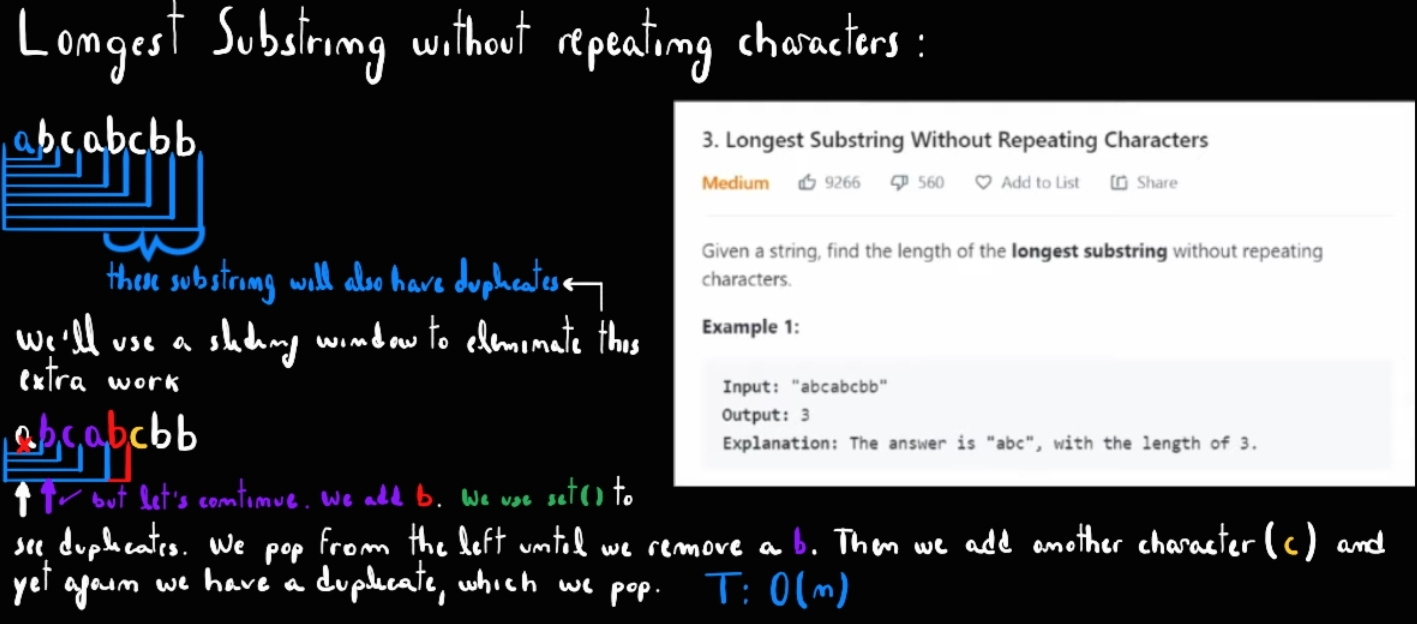

In [ ]:
from typing import List


class Solution:
    def length_longest_substring(self, s: str) -> int:
        char_set = set()
        l = 0
        res = 0
        for r in range(len(s)):
            # detect and remove chars until no more duplicates
            while s[r] in char_set:
                char_set.remove(s[l])
                l += 1
            # after kicking out all duplicates from the set, add
            # the recent char
            char_set.add(s[r])
            res = max(res, r - l + 1)
        return res


sol = Solution()
sol.length_longest_substring("abcdefffffff")

# Longest Repeating Character Replacement

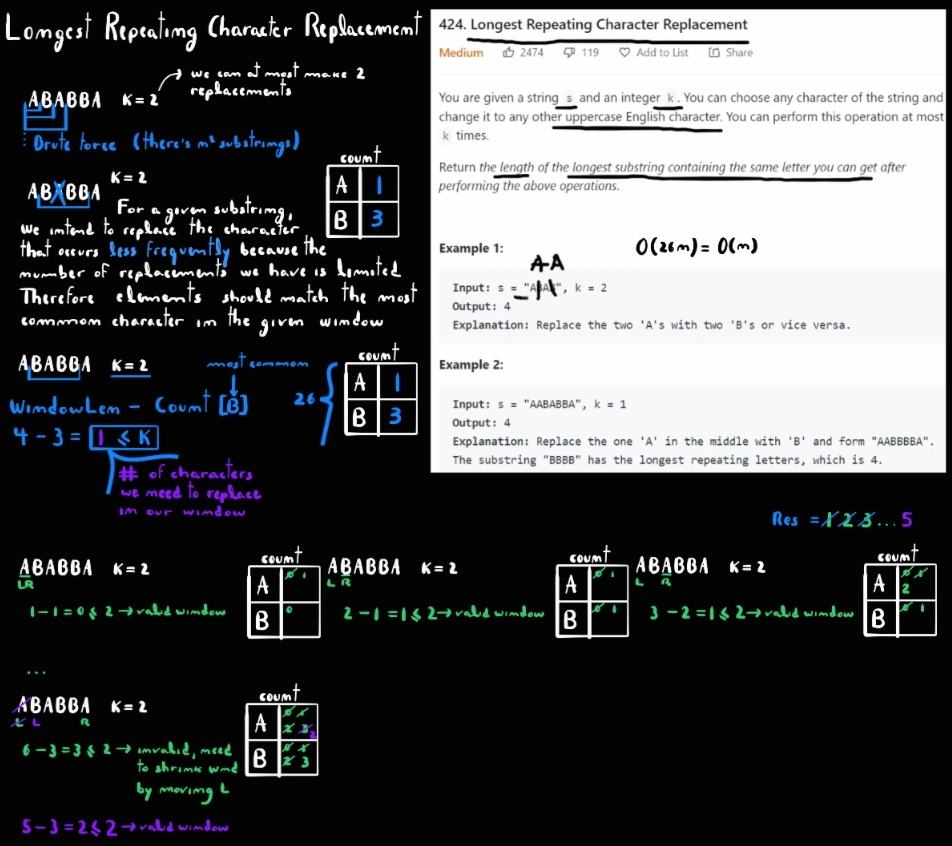

In [ ]:
class Solution:
    def character_replacement(self, s: str, k: int) -> int:
        # hashmap to keep count
        count = {}
        # longest substring we can create with k replacements
        # initialized to 0
        res = 0
        l = 0
        # iterate through the string 's'
        for r in range(len(s)):
            # makes an entry per char found in 's'
            # if no entry in hashmap yet, count is 0
            count[s[r]] = 1 + count.get(s[r], 0)
            # while invalid window (limit replacements are k) we move L
            # the quantity '(r - l + 1) - max(count.values())' is the
            # number of replacements we would have to make to make all
            # characters in the window the same
            while (r - l + 1) - max(count.values()) > k:
                # as we move the 'L' pointer, we need to remove
                # from the count that element
                count[s[l]] -= 1
                l += 1
            # once valid window again (valid is we have enough k to replace
            # the chars we need to replace), update the result
            res = max(res, r - l + 1)
        return res

    def character_replacement_max_freq(self, s: str, k: int) -> int:
        # hashmap to keep count
        count = {}
        # longest substring we can create with k replacements
        # initialized to 0
        res = 0
        l = 0
        maxf = 0
        # iterate through the string 's'
        for r in range(len(s)):
            # makes an entry per char found in 's'
            # if no entry in hashmap yet, count is 0
            count[s[r]] = 1 + count.get(s[r], 0)
            # while invalid window (limit replacements are k) we move L
            # the quantity '(r - l + 1) - max(count.values())' is the
            # number of replacements we would have to make to make all
            # characters in the window the same
            maxf = max(maxf, count[s[r]])
            while (r - l + 1) - maxf > k:
                # as we move the 'L' pointer, we need to remove
                # from the count that element
                # but no need to remove maxf because decreasing it has no
                # effect as it is defined as max(maxf, count[s[r]]), meaning
                # it either stays the same or increases
                count[s[l]] -= 1
                l += 1
            # once valid window again (valid is we have enough k to replace
            # the chars we need to replace), update the result
            res = max(res, r - l + 1)
        return res


sol = Solution()
sol.character_replacement("AABABBA", 2)
sol.character_replacement_max_freq("AABABBA", 2)

# Find All Anagrams in a String

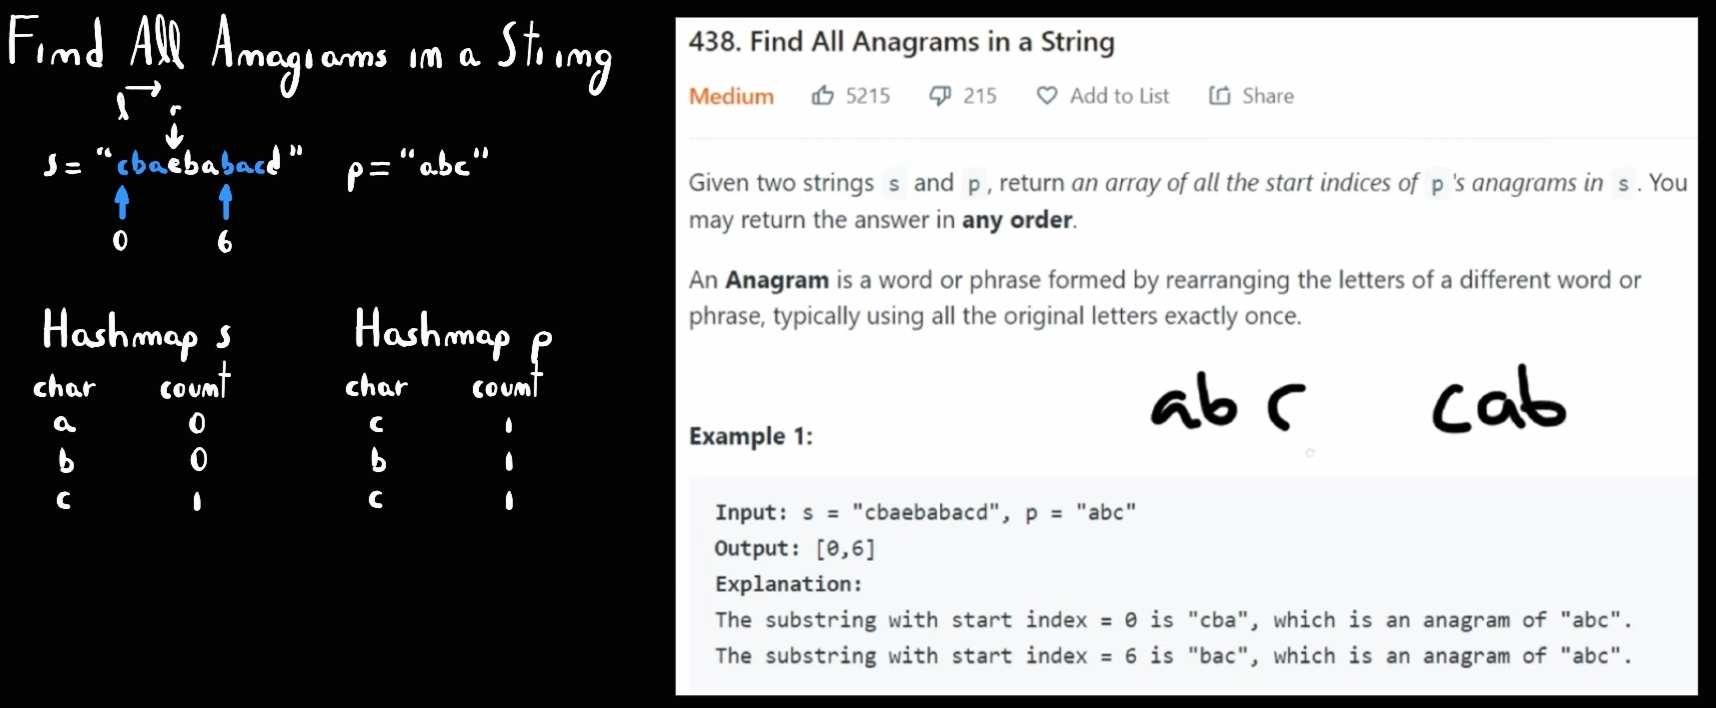

In [ ]:
class Solution:
    def find_anagram(self, s: str, p: str) -> list[int]:
        if len(p) > len(s):
            return []
        s_map, p_map = {}, {}
        for i in range(len(p)):
            p_map[p[i]] = 1 + p_map.get(p[i], 0)
            s_map[s[i]] = 1 + s_map.get(s[i], 0)
        res = [0] if s_map == p_map else []
        l = 0
        for r in range(len(p), len(s)):
            s_map[s[r]] = 1 + s_map.get(s[r], 0)
            s_map[s[l]] -= 1
            if s_map[s[l]] == 0:
                s_map.pop(s[l])
            l += 1
            if s_map == p_map:
                res.append(l)
        return res


sol = Solution()
sol.find_anagram("cbaebabacd", "abc")

# Vacation Scheduler

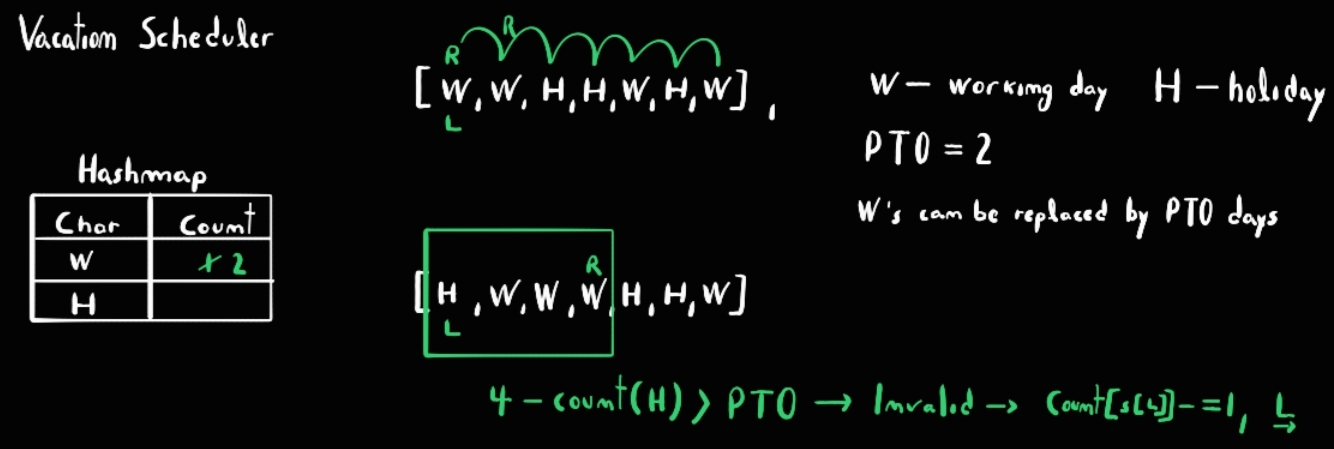

In [ ]:
from typing import List


class Solution:
    def vac_len(self, schd: list[str], pto: int) -> int:
        l = 0
        res_len = 0
        count = {}
        for r in range(len(schd)):
            count[schd[r]] = 1 + count.get(schd[r], 0)
            while (r - l + 1) - count.get("H", 0) > pto:
                count[schd[l]] -= 1
                l += 1
            res_len = max(res_len, r - l + 1)
        return res_len


sol = Solution()
sol.vac_len(["W", "H", "W", "W", "W", "H", "H", "H", "W"], 3)

# Frequency of the Most Frequent Element

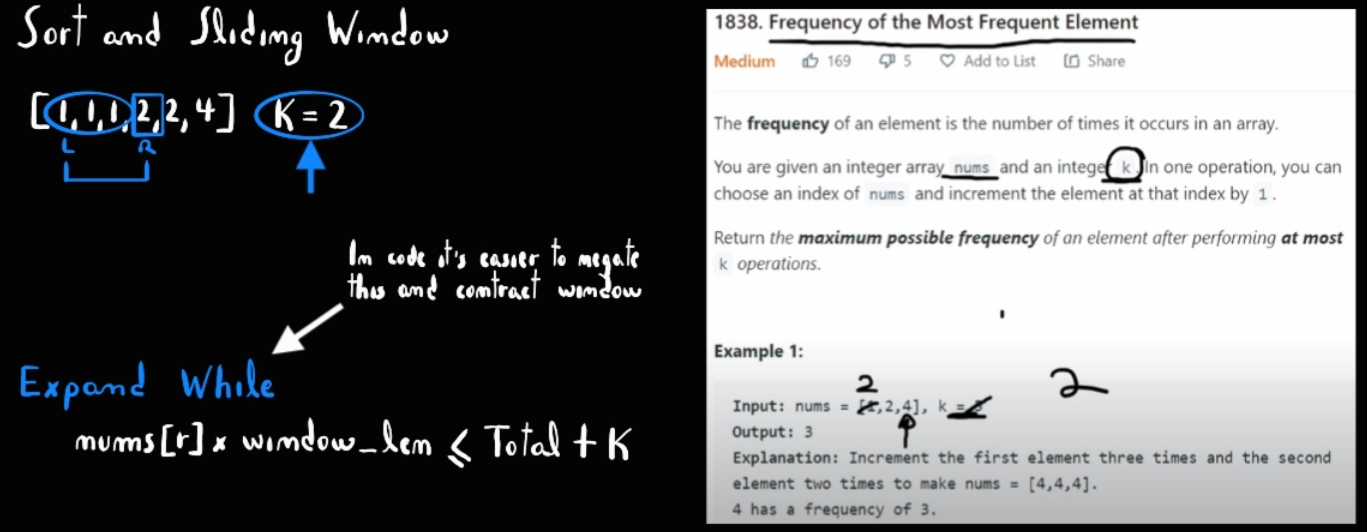

In [ ]:
from typing import List


class Solution:
    def max_freq(self, nums: List[int], k: int) -> int:
        l, r = 0, 0
        output = 0
        total = 0
        nums.sort()
        for r in range(len(nums)):
            total += nums[r]
            # check invalid window and contract, adjusting the total
            while nums[r] * (r - l + 1) > total + k:
                total -= nums[l]
                l += 1
            output = max(output, r - l + 1)
        return output


sol = Solution()
sol.max_freq([1, 4, 8, 13], 5)

# Minimum Number of Flips to Make the Binary String Alternating

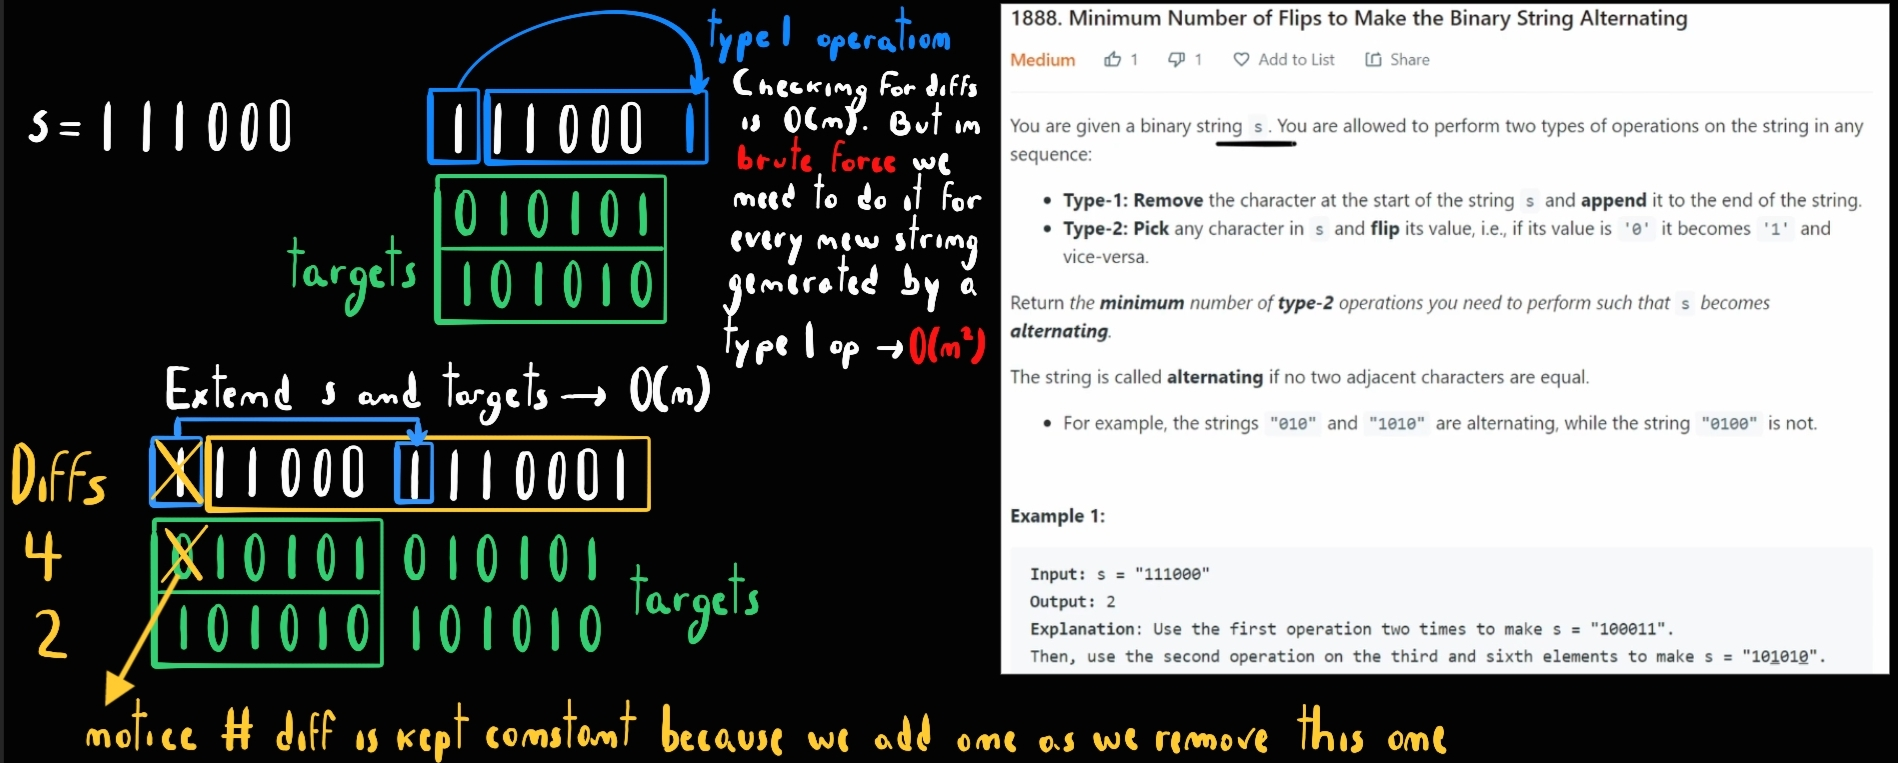

In [ ]:
class Solution:
    def min_flips(self, s: str) -> int:
        len_s = len(s)
        s = s + s
        alt1, alt2 = "", ""
        diff1, diff2 = 0, 0
        for i in range(len(s)):
            alt1 += "0" if i % 2 == 0 else "1"
            alt2 += "1" if i % 2 == 0 else "0"
        l = 0
        res = float("inf")
        for r in range(len(s)):
            if s[r] != alt1[r]:
                diff1 += 1
            if s[r] != alt2[r]:
                diff2 += 1
            if (r - l + 1) > len_s:
                if s[l] != alt1[l]:
                    diff1 -= 1
                if s[l] != alt2[l]:
                    diff2 -= 1
                l += 1
            if (r - l + 1) >= len_s:
                res = min(res, diff1, diff2)
        return res


sol = Solution()
sol.min_flips("01001001101")

0